M2780.002400 Machine Listening (Fall 2020)

Instructor: Kyogu Lee (kglee@snu.ac.kr)

# Assignment 7: Improving Machine Learning

(85 points)

Due Date : This assignment is due by 12:59PM, November 10 (Tuesday)


---

Assignment

This assignment is composed of two parts: Theory and Lab assignments, you will need to write the answers for the Theory problems and Notebook scripts and/or functions as required. Submit them electronically (via **ETL**) by the end of the due date.

# Theory (45pts)


---

1.   Bias and Variance, Regularization  (10 pts)

Suppose you are using Ridge Regression and you notice that the training error
and the validation error are almost equal and fairly high. Would you say that the
model suffers from high bias or high variance? Should you increase the regularization
hyperparameter α or reduce it?

---

2.   Regularization  (10 pts)

Suppose you are using Polynomial Regression. You plot the learning curves and
you notice that there is a large gap between the training error and the validation
error. What is happening? What are three ways to solve this?

---

3. Dropout (10 pts)

 a. Explain the dropout technique in terms of the dropout rate *p*.

 b. Does dropout slow down training? Does it slow down inference (i.e., making
predictions on new instances)?

---

4. Optimization (15 pts)

State the *True* or *False* for the followings.

  a. Adam should be used with batch gradient computations, not with mini-batches.

  b. Adam combines the advantages of RMSProp and gradient descent with momentum.

  c. The learning rate of the Adam optimizer does not need to be tuned.

# Lab (40pts)

For all lab assignments, submit your Notebook file (.ipynb) and audio files (.wav) with one compressed (.zip) file, via **ETL**. The Notebook file and zip file should be named with your full name and the homework number – e.g., ***아무개_hw7.ipynb, 아무개_hw7.zip***

In addition to writing Python scripts and/or functions in your Notebook file, there are also questions you’ll have to answer. For such questions, you should provide answers in your Notebook file using Text sections.

**Please submit the codes executed (make sure that the results of your codes are visible in the submitted assignments) so that the grader can check whether the code is working or not.**

In [7]:
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers import Dense, Activation, BatchNormalization
from keras.regularizers import l1, l2
from keras.utils import np_utils

from sklearn.metrics import classification_report, confusion_matrix
import itertools


'''
config = tf.compat.v1.ConfigProto(device_count = {'GPU': 0 , 'CPU': 8})
sess = tf.compat.v1.Session(config=config) 
keras.backend.set_session(sess)
'''

"\nconfig = tf.compat.v1.ConfigProto(device_count = {'GPU': 0 , 'CPU': 8})\nsess = tf.compat.v1.Session(config=config) \nkeras.backend.set_session(sess)\n"


---

1.   MNIST using keras with L1, L2 regularization  (10 pts)

Refer to the lab6 and Keras tutorials to create and learn a neural network that classifies MNIST handwriting data and organize the results using keras. Use the best model you created at problem 3 on assignment6. Implement l1 and l2 regularization on the loss function using keras.regularizers. Compare the results of three models, with no regularization, with L1 regularization, and L2 regularization using accuracy and confusion matrix.

In [8]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
classes = 10
Y_train = np_utils.to_categorical(Y_train, classes)
Y_test = np_utils.to_categorical(Y_test, classes)

In [9]:
batch_size = 256
epochs = 100

In [16]:
input_dim=784
nn_hdim_1 = 1024
nn_hdim_2 = 512
nn_hdim_3 = 128
output_dim = 10

model = Sequential()
model.add(Dense(nn_hdim_1, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dense(nn_hdim_2))
model.add(Activation('relu'))
model.add(Dense(nn_hdim_3))
model.add(Activation('relu'))
model.add(Dense(output_dim))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', 
              metrics=['accuracy'], optimizer='adadelta')

In [17]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/100
235/235 [==============================] - 1s 6ms/step - loss: 2.2877 - accuracy: 0.1044
Epoch 2/100
235/235 [==============================] - 1s 6ms/step - loss: 2.1900 - accuracy: 0.2409
Epoch 3/100
235/235 [==============================] - 2s 7ms/step - loss: 2.0891 - accuracy: 0.4224
Epoch 4/100
235/235 [==============================] - 2s 7ms/step - loss: 1.9794 - accuracy: 0.5521
Epoch 5/100
235/235 [==============================] - 2s 7ms/step - loss: 1.8617 - accuracy: 0.6260
Epoch 6/100
235/235 [==============================] - 2s 7ms/step - loss: 1.7387 - accuracy: 0.6760
Epoch 7/100
235/235 [==============================] - 2s 6ms/step - loss: 1.6132 - accuracy: 0.7178
Epoch 8/100
235/235 [==============================] - 2s 7ms/step - loss: 1.4891 - accuracy: 0.7484
Epoch 9/100
235/235 [==============================] - 2s 7ms/step - loss: 1.3711 - accuracy: 0.7707
Epoch 10/100
235/235 [==============================] - 2s 6ms/step - loss: 1.2617 - accura

235/235 [==============================] - 2s 7ms/step - loss: 0.2972 - accuracy: 0.9177
Epoch 82/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2957 - accuracy: 0.9183
Epoch 83/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2943 - accuracy: 0.9186
Epoch 84/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2928 - accuracy: 0.9188
Epoch 85/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2914 - accuracy: 0.9192
Epoch 86/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2900 - accuracy: 0.9195
Epoch 87/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2887 - accuracy: 0.9199
Epoch 88/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2873 - accuracy: 0.9201
Epoch 89/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2860 - accuracy: 0.9204
Epoch 90/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2847 - accuracy: 

In [18]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1])

313/313 [==============================] - 0s 905us/step - loss: 0.2630 - accuracy: 0.9280

Test accuracy: 0.9279999732971191


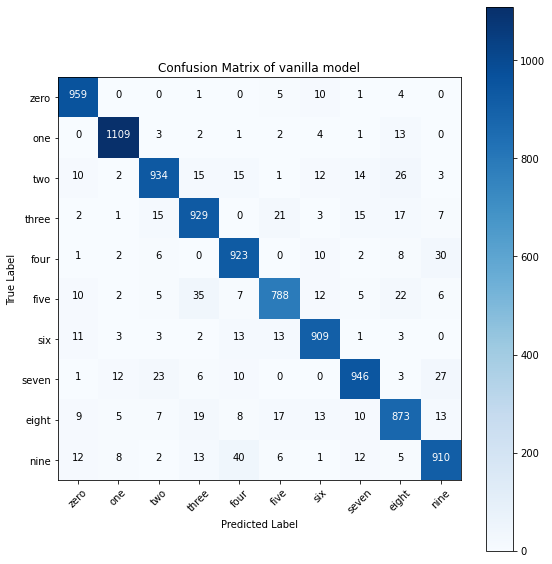

In [19]:
Y_pred_vanilla = model.predict(X_test)
y_pred_vanilla = np.argmax(Y_pred_vanilla, axis=1)
y_gt = np.argmax(Y_test, axis=1)

plt.figure(figsize=(8,8))
cm = confusion_matrix(y_gt, y_pred_vanilla)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix of vanilla model")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'], rotation=45)
plt.yticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'])
thresh = cm.max()/2.
normalize = False
fmt = '.2f' if normalize else 'd'
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, format(cm[i,j], fmt), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()


In [20]:
input_dim=784
nn_hdim_1 = 1024
nn_hdim_2 = 512
nn_hdim_3 = 128
output_dim = 10
model_l1 = Sequential()
# model_l1.add(Dense(nn_hdim_1, input_dim=input_dim, ))
model_l1.add(Dense(nn_hdim_1, kernel_regularizer=l1(0.001), input_dim=784))
model_l1.add(Activation('relu'))
model_l1.add(Dense(nn_hdim_2, kernel_regularizer=l1(0.001)))
model_l1.add(Activation('relu'))
model_l1.add(Dense(nn_hdim_3, kernel_regularizer=l1(0.001)))
model_l1.add(Activation('relu'))
model_l1.add(Dense(output_dim, kernel_regularizer=l1(0.001)))
model_l1.add(Activation('softmax'))

model_l1.compile(loss='categorical_crossentropy', 
                 metrics=['accuracy'], optimizer='adadelta')

In [21]:
print(X_train.shape)
model_l1.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

(60000, 784)
Epoch 1/100
235/235 [==============================] - 2s 9ms/step - loss: 44.9532 - accuracy: 0.1416
Epoch 2/100
235/235 [==============================] - 2s 9ms/step - loss: 44.6092 - accuracy: 0.2713
Epoch 3/100
235/235 [==============================] - 2s 9ms/step - loss: 44.2500 - accuracy: 0.4056
Epoch 4/100
235/235 [==============================] - 2s 8ms/step - loss: 43.8804 - accuracy: 0.5101
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 43.5019 - accuracy: 0.5838
Epoch 6/100
235/235 [==============================] - 2s 8ms/step - loss: 43.1168 - accuracy: 0.6287
Epoch 7/100
235/235 [==============================] - 2s 9ms/step - loss: 42.7285 - accuracy: 0.6634
Epoch 8/100
235/235 [==============================] - 2s 9ms/step - loss: 42.3411 - accuracy: 0.6931
Epoch 9/100
235/235 [==============================] - 2s 8ms/step - loss: 41.9584 - accuracy: 0.7185
Epoch 10/100
235/235 [==============================] - 2s 8ms/step -

235/235 [==============================] - 2s 9ms/step - loss: 23.6289 - accuracy: 0.8960
Epoch 81/100
235/235 [==============================] - 2s 9ms/step - loss: 23.4217 - accuracy: 0.8964
Epoch 82/100
235/235 [==============================] - 2s 9ms/step - loss: 23.2159 - accuracy: 0.8965
Epoch 83/100
235/235 [==============================] - 2s 9ms/step - loss: 23.0112 - accuracy: 0.8968
Epoch 84/100
235/235 [==============================] - 2s 9ms/step - loss: 22.8075 - accuracy: 0.8967
Epoch 85/100
235/235 [==============================] - 2s 9ms/step - loss: 22.6048 - accuracy: 0.8971
Epoch 86/100
235/235 [==============================] - 2s 9ms/step - loss: 22.4032 - accuracy: 0.8971
Epoch 87/100
235/235 [==============================] - 2s 9ms/step - loss: 22.2027 - accuracy: 0.8974
Epoch 88/100
235/235 [==============================] - 2s 9ms/step - loss: 22.0033 - accuracy: 0.8977
Epoch 89/100
235/235 [==============================] - 2s 8ms/step - loss: 21.8047 - 

In [22]:
score = model_l1.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 19.5811 - accuracy: 0.9050

Test accuracy: 0.9049999713897705


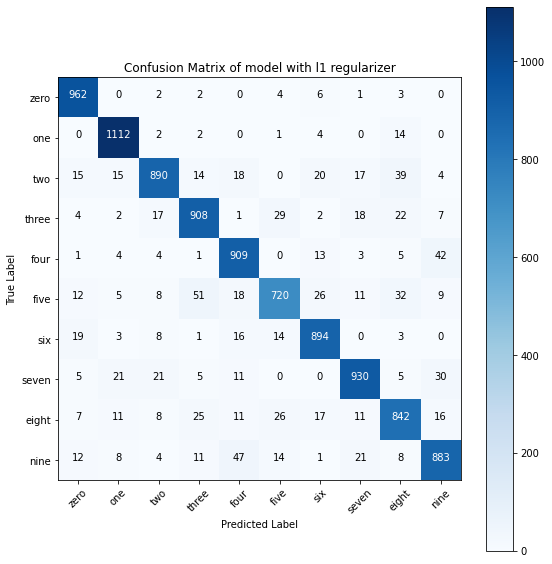

In [23]:
Y_pred_l1 = model_l1.predict(X_test)
y_pred_l1 = np.argmax(Y_pred_l1, axis=1)
y_gt = np.argmax(Y_test, axis=1)

plt.figure(figsize=(8,8))
cm = confusion_matrix(y_gt, y_pred_l1)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix of model with l1 regularizer")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'], rotation=45)
plt.yticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'])
thresh = cm.max()/2.
normalize = False
fmt = '.2f' if normalize else 'd'
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, format(cm[i,j], fmt), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()


In [26]:
input_dim=784
nn_hdim_1 = 1024
nn_hdim_2 = 512
nn_hdim_3 = 128
output_dim = 10

model_l2 = Sequential()
model_l2.add(Dense(nn_hdim_1, kernel_regularizer=l2(0.001), input_dim=784))
model.add(Activation('relu'))
model_l2.add(Dense(nn_hdim_2, kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model_l2.add(Dense(nn_hdim_3, kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model_l2.add(Dense(output_dim, kernel_regularizer=l2(0.001)))
model_l2.add(Activation('softmax'))

model_l2.compile(loss='categorical_crossentropy', 
                 metrics=['accuracy'], optimizer='adadelta')

In [27]:
print(X_train.shape)
model_l2.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

(60000, 784)
Epoch 1/100
235/235 [==============================] - 2s 8ms/step - loss: 3.9483 - accuracy: 0.2489
Epoch 2/100
235/235 [==============================] - 2s 8ms/step - loss: 3.4473 - accuracy: 0.5676
Epoch 3/100
235/235 [==============================] - 2s 8ms/step - loss: 3.1063 - accuracy: 0.7050
Epoch 4/100
235/235 [==============================] - 2s 8ms/step - loss: 2.8773 - accuracy: 0.7600
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 2.7206 - accuracy: 0.7915
Epoch 6/100
235/235 [==============================] - 2s 8ms/step - loss: 2.6102 - accuracy: 0.8120
Epoch 7/100
235/235 [==============================] - 2s 8ms/step - loss: 2.5300 - accuracy: 0.8271
Epoch 8/100
235/235 [==============================] - 2s 8ms/step - loss: 2.4696 - accuracy: 0.8375
Epoch 9/100
235/235 [==============================] - 2s 8ms/step - loss: 2.4230 - accuracy: 0.8459
Epoch 10/100
235/235 [==============================] - 2s 8ms/step - loss: 2.

235/235 [==============================] - 2s 8ms/step - loss: 2.0225 - accuracy: 0.9093
Epoch 82/100
235/235 [==============================] - 2s 8ms/step - loss: 2.0207 - accuracy: 0.9095
Epoch 83/100
235/235 [==============================] - 2s 8ms/step - loss: 2.0189 - accuracy: 0.9097
Epoch 84/100
235/235 [==============================] - 2s 8ms/step - loss: 2.0170 - accuracy: 0.9099
Epoch 85/100
235/235 [==============================] - 2s 8ms/step - loss: 2.0152 - accuracy: 0.9101
Epoch 86/100
235/235 [==============================] - 2s 8ms/step - loss: 2.0134 - accuracy: 0.9102
Epoch 87/100
235/235 [==============================] - 2s 8ms/step - loss: 2.0116 - accuracy: 0.9104
Epoch 88/100
235/235 [==============================] - 2s 8ms/step - loss: 2.0098 - accuracy: 0.9105
Epoch 89/100
235/235 [==============================] - 2s 8ms/step - loss: 2.0080 - accuracy: 0.9106
Epoch 90/100
235/235 [==============================] - 2s 8ms/step - loss: 2.0063 - accuracy: 

In [28]:
score = model_l2.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 1.9775 - accuracy: 0.9159

Test accuracy: 0.9158999919891357


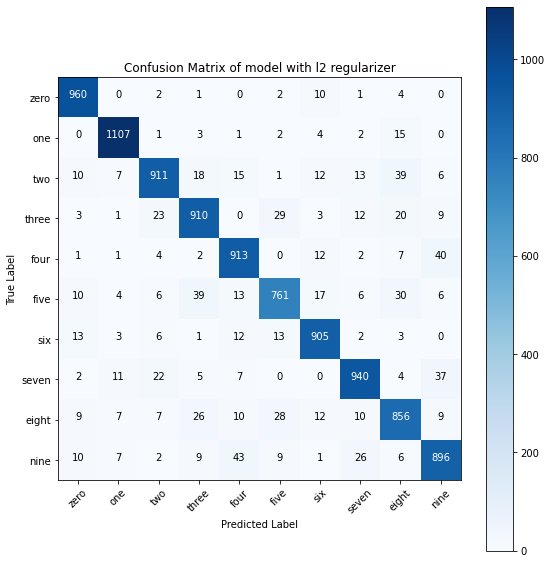

In [30]:
Y_pred_l2 = model_l2.predict(X_test)
y_pred_l2 = np.argmax(Y_pred_l2, axis=1)
y_gt = np.argmax(Y_test, axis=1)

plt.figure(figsize=(8,8))
cm = confusion_matrix(y_gt, y_pred_l2)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix of model with l2 regularizer")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'], rotation=45)
plt.yticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'])
thresh = cm.max()/2.
normalize = False
fmt = '.2f' if normalize else 'd'
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, format(cm[i,j], fmt), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()


## Summary

313/313 [==============================] - 1s 2ms/step - loss: 1.9775 - accuracy: 0.9159

Test accuracy of vanilla model: 0.9279999732971191

Test accuracy of model with l1 regularizer: 0.9049999713897705

Test accuracy of model with l2 regularizer: 0.9158999919891357


<function matplotlib.pyplot.clf()>

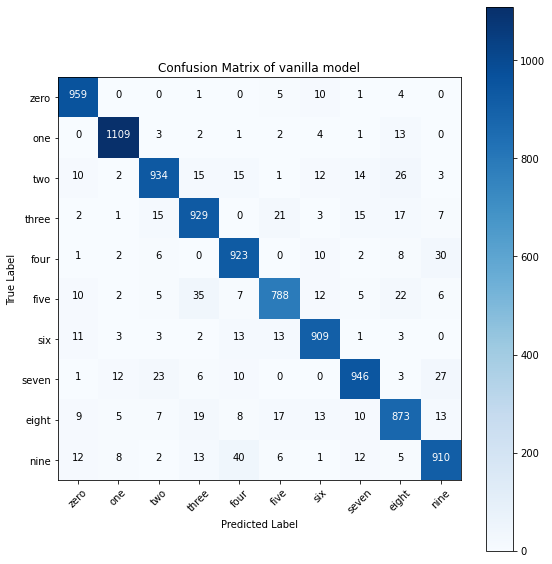

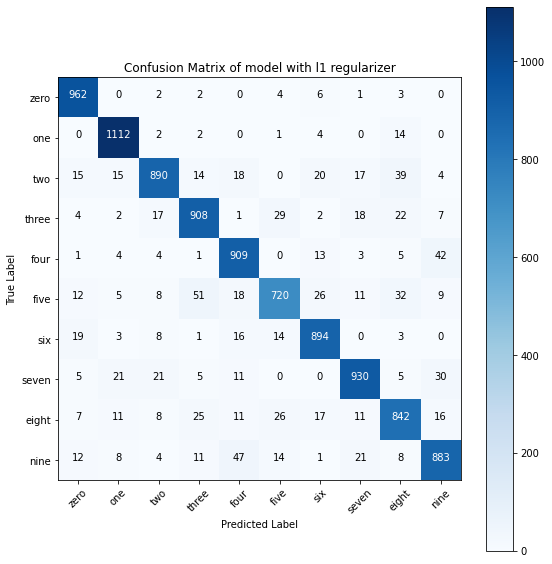

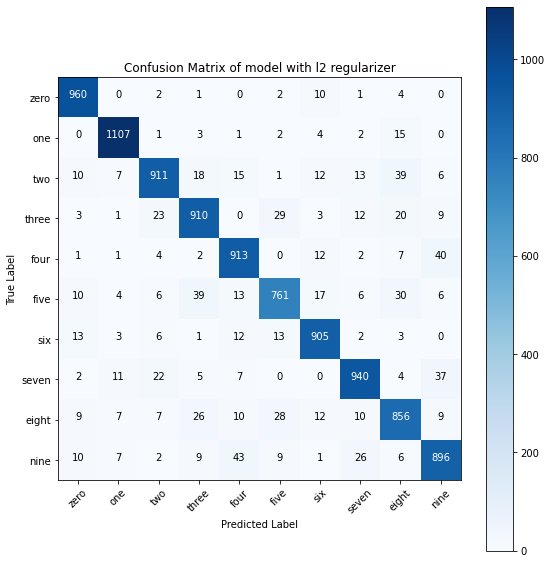

In [41]:
score_vanilla = model.evaluate(X_test, Y_test, verbose=1)
score_l1 = model_l1.evaluate(X_test, Y_test, verbose=1)
score_l2 = model_l2.evaluate(X_test, Y_test, verbose=1)

print('\n''Test accuracy of vanilla model:', score_vanilla[1])
print('\n''Test accuracy of model with l1 regularizer:', score_l1[1])
print('\n''Test accuracy of model with l2 regularizer:', score_l2[1])


plt.figure(figsize=(8,8))
cm = confusion_matrix(y_gt, y_pred_vanilla)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix of vanilla model")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'], rotation=45)
plt.yticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'])
thresh = cm.max()/2.
normalize = False
fmt = '.2f' if normalize else 'd'
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, format(cm[i,j], fmt), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.clf

plt.figure(figsize=(8,8))
cm = confusion_matrix(y_gt, y_pred_l1)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix of model with l1 regularizer")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'], rotation=45)
plt.yticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'])
thresh = cm.max()/2.
normalize = False
fmt = '.2f' if normalize else 'd'
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, format(cm[i,j], fmt), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.clf

plt.figure(figsize=(8,8))
cm = confusion_matrix(y_gt, y_pred_l2)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix of model with l2 regularizer")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'], rotation=45)
plt.yticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'])
thresh = cm.max()/2.
normalize = False
fmt = '.2f' if normalize else 'd'
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, format(cm[i,j], fmt), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.clf



---


2.   MNIST using keras with batch normalization  (10 pts)


Refer to the lab6 and Keras tutorials  to create and learn a neural network that classifies MNIST handwriting data and organize the results using keras. Use the best model you created at problem 3 on assignment6. Implement barch normalization on two of your hidden layers using keras.layers.BatchNormalization. Compare the results of two models, with batch normalizaion and without batch normalization using accuracy and confusion matrix.

In [35]:
input_dim=784
nn_hdim_1 = 1024
nn_hdim_2 = 512
nn_hdim_3 = 128
output_dim = 10
model_bn = Sequential()
# model_l1.add(Dense(nn_hdim_1, input_dim=input_dim, ))
model_bn.add(Dense(nn_hdim_1, input_dim=784))
model.add(BatchNormalization())
model.add(Activation('relu'))
model_bn.add(Dense(nn_hdim_2))
model.add(BatchNormalization())
model.add(Activation('relu'))
model_bn.add(Dense(nn_hdim_3))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model_bn.add(Dense(output_dim))
model_bn.add(Activation('softmax'))

model_bn.compile(loss='categorical_crossentropy', 
                 metrics=['accuracy'], optimizer='adadelta')

In [36]:
model_bn.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/100
235/235 [==============================] - 1s 6ms/step - loss: 2.1354 - accuracy: 0.2322
Epoch 2/100
235/235 [==============================] - 2s 7ms/step - loss: 1.6698 - accuracy: 0.5780
Epoch 3/100
235/235 [==============================] - 2s 7ms/step - loss: 1.3459 - accuracy: 0.6956
Epoch 4/100
235/235 [==============================] - 2s 6ms/step - loss: 1.1207 - accuracy: 0.7509
Epoch 5/100
235/235 [==============================] - 2s 6ms/step - loss: 0.9630 - accuracy: 0.7852
Epoch 6/100
235/235 [==============================] - 1s 6ms/step - loss: 0.8504 - accuracy: 0.8059
Epoch 7/100
235/235 [==============================] - 2s 6ms/step - loss: 0.7679 - accuracy: 0.8212
Epoch 8/100
235/235 [==============================] - 2s 7ms/step - loss: 0.7056 - accuracy: 0.8319
Epoch 9/100
235/235 [==============================] - 2s 7ms/step - loss: 0.6573 - accuracy: 0.8416
Epoch 10/100
235/235 [==============================] - 2s 7ms/step - loss: 0.6190 - accura

235/235 [==============================] - 2s 6ms/step - loss: 0.3196 - accuracy: 0.9094
Epoch 82/100
235/235 [==============================] - 2s 7ms/step - loss: 0.3189 - accuracy: 0.9095
Epoch 83/100
235/235 [==============================] - 2s 7ms/step - loss: 0.3183 - accuracy: 0.9099
Epoch 84/100
235/235 [==============================] - 2s 7ms/step - loss: 0.3177 - accuracy: 0.9100
Epoch 85/100
235/235 [==============================] - 2s 7ms/step - loss: 0.3171 - accuracy: 0.9102
Epoch 86/100
235/235 [==============================] - 2s 7ms/step - loss: 0.3165 - accuracy: 0.9101
Epoch 87/100
235/235 [==============================] - 2s 7ms/step - loss: 0.3159 - accuracy: 0.9103
Epoch 88/100
235/235 [==============================] - 2s 7ms/step - loss: 0.3154 - accuracy: 0.9105
Epoch 89/100
235/235 [==============================] - 2s 6ms/step - loss: 0.3148 - accuracy: 0.9108
Epoch 90/100
235/235 [==============================] - 2s 7ms/step - loss: 0.3143 - accuracy: 

In [37]:
score = model_bn.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1])

313/313 [==============================] - 0s 942us/step - loss: 0.2998 - accuracy: 0.9167

Test accuracy: 0.916700005531311


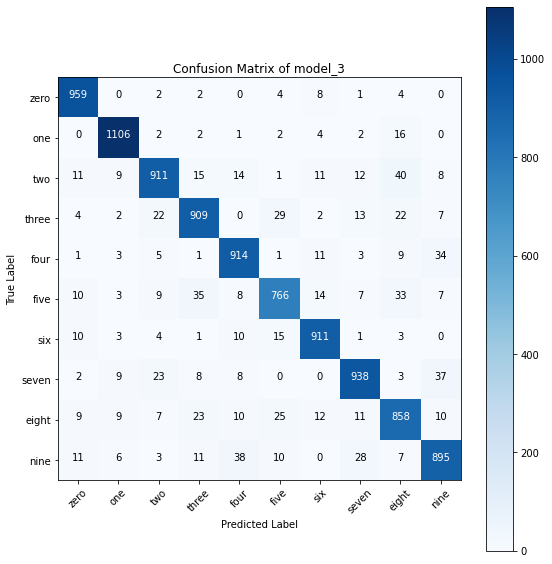

In [38]:
Y_pred_bn = model_bn.predict(X_test)
y_pred_bn = np.argmax(Y_pred_bn, axis=1)
y_gt = np.argmax(Y_test, axis=1)

plt.figure(figsize=(8,8))
cm = confusion_matrix(y_gt, y_pred_bn)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix of model_3")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'], rotation=45)
plt.yticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'])
thresh = cm.max()/2.
normalize = False
fmt = '.2f' if normalize else 'd'
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, format(cm[i,j], fmt), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()


## Summary

313/313 [==============================] - 0s 893us/step - loss: 0.2998 - accuracy: 0.9167

Test accuracy of vanilla model: 0.9279999732971191

Test accuracy of model with Batch Norm: 0.916700005531311


<function matplotlib.pyplot.clf()>

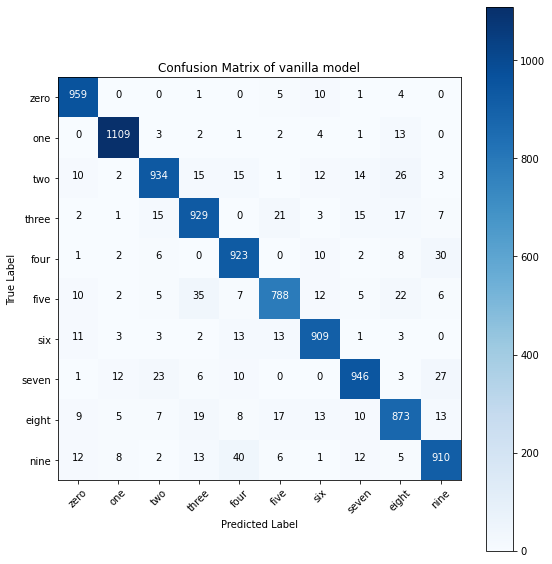

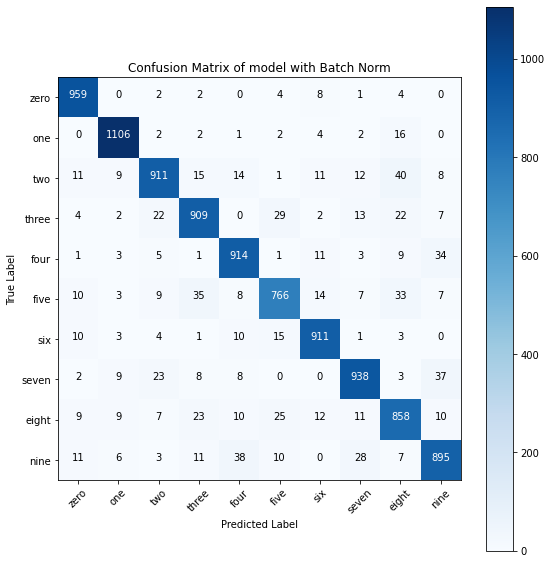

In [42]:
score_vanilla = model.evaluate(X_test, Y_test, verbose=1)
score_bn = model_bn.evaluate(X_test, Y_test, verbose=1)

print('\n''Test accuracy of vanilla model:', score_vanilla[1])
print('\n''Test accuracy of model with Batch Norm:', score_bn[1])


plt.figure(figsize=(8,8))
cm = confusion_matrix(y_gt, y_pred_vanilla)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix of vanilla model")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'], rotation=45)
plt.yticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'])
thresh = cm.max()/2.
normalize = False
fmt = '.2f' if normalize else 'd'
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, format(cm[i,j], fmt), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.clf

plt.figure(figsize=(8,8))
cm = confusion_matrix(y_gt, y_pred_bn)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix of model with Batch Norm")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'], rotation=45)
plt.yticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'])
thresh = cm.max()/2.
normalize = False
fmt = '.2f' if normalize else 'd'
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, format(cm[i,j], fmt), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.clf


---


3.   MNIST using keras with different optimizers  (20 pts)


Refer to the lab6 and Keras tutorials to create and learn a neural network that classifies MNIST handwriting data and organize the results using keras. Use the best model you created at problem 3 on assignment6. Change the optimizer of the model to Stochastic Gradient Descent, RMSprop, Adagrad, and Adam using  keras.optimizers. Compare the results of the four models using accuracy, confusion matrix, and by plotting the loss of the models by epoch as they train.

In [45]:
input_dim=784
nn_hdim_1 = 1024
nn_hdim_2 = 512
nn_hdim_3 = 128
output_dim = 10

model_sgd = Sequential()
model_sgd.add(Dense(nn_hdim_1, input_dim=input_dim))
model_sgd.add(Activation('relu'))
model_sgd.add(Dense(nn_hdim_2))
model_sgd.add(Activation('relu'))
model_sgd.add(Dense(nn_hdim_3))
model_sgd.add(Activation('relu'))
model_sgd.add(Dense(output_dim))
model_sgd.add(Activation('softmax'))

model_sgd.compile(loss='categorical_crossentropy',
                  metrics=['accuracy'], optimizer='sgd')

In [46]:
history_sgd = model_sgd.fit(X_train, Y_train, batch_size=batch_size, 
                            epochs=epochs, verbose=1)

Epoch 1/100
235/235 [==============================] - 1s 5ms/step - loss: 1.4804 - accuracy: 0.6617
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.5744 - accuracy: 0.8646
Epoch 3/100
235/235 [==============================] - 1s 6ms/step - loss: 0.4075 - accuracy: 0.8929
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3459 - accuracy: 0.9055
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3107 - accuracy: 0.9134
Epoch 6/100
235/235 [==============================] - 1s 6ms/step - loss: 0.2862 - accuracy: 0.9201
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2672 - accuracy: 0.9251
Epoch 8/100
235/235 [==============================] - 1s 6ms/step - loss: 0.2517 - accuracy: 0.9289
Epoch 9/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2387 - accuracy: 0.9329
Epoch 10/100
235/235 [==============================] - 1s 6ms/step - loss: 0.2271 - accura

235/235 [==============================] - 1s 5ms/step - loss: 0.0400 - accuracy: 0.9901
Epoch 82/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0392 - accuracy: 0.9904
Epoch 83/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0386 - accuracy: 0.9907
Epoch 84/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0379 - accuracy: 0.9910
Epoch 85/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0372 - accuracy: 0.9909
Epoch 86/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0365 - accuracy: 0.9914
Epoch 87/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0359 - accuracy: 0.9912
Epoch 88/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0352 - accuracy: 0.9913
Epoch 89/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0346 - accuracy: 0.9919
Epoch 90/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0340 - accuracy: 

In [47]:
score = model_sgd.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1])

313/313 [==============================] - 0s 869us/step - loss: 0.0700 - accuracy: 0.9783

Test accuracy: 0.9782999753952026


In [48]:
input_dim=784
nn_hdim_1 = 1024
nn_hdim_2 = 512
nn_hdim_3 = 128
output_dim = 10

model_rmsprop = Sequential()
model_rmsprop.add(Dense(nn_hdim_1, input_dim=input_dim))
model_rmsprop.add(Activation('relu'))
model_rmsprop.add(Dense(nn_hdim_2))
model_rmsprop.add(Activation('relu'))
model_rmsprop.add(Dense(nn_hdim_3))
model_rmsprop.add(Activation('relu'))
model_rmsprop.add(Dense(output_dim))
model_rmsprop.add(Activation('softmax'))

model_rmsprop.compile(loss='categorical_crossentropy', 
                      metrics=['accuracy'], optimizer='rmsprop')


In [49]:
history_rmsprop = model_rmsprop.fit(X_train, Y_train, batch_size=batch_size, 
                                    epochs=epochs, verbose=1)

Epoch 1/100
235/235 [==============================] - 2s 8ms/step - loss: 0.2852 - accuracy: 0.9105
Epoch 2/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0916 - accuracy: 0.9710
Epoch 3/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0571 - accuracy: 0.9822
Epoch 4/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0408 - accuracy: 0.9872
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0318 - accuracy: 0.9904
Epoch 6/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0244 - accuracy: 0.9926
Epoch 7/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0200 - accuracy: 0.9941
Epoch 8/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0175 - accuracy: 0.9949
Epoch 9/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0158 - accuracy: 0.9952
Epoch 10/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0134 - accura

235/235 [==============================] - 2s 8ms/step - loss: 0.0013 - accuracy: 0.9997
Epoch 82/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0030 - accuracy: 0.9997
Epoch 83/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0032 - accuracy: 0.9996
Epoch 84/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0027 - accuracy: 0.9997
Epoch 85/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0019 - accuracy: 0.9996
Epoch 86/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0034 - accuracy: 0.9996
Epoch 87/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0043 - accuracy: 0.9994
Epoch 88/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0014 - accuracy: 0.9998
Epoch 89/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0026 - accuracy: 0.9998
Epoch 90/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0032 - accuracy: 

In [50]:
score = model_rmsprop.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1])

313/313 [==============================] - 0s 925us/step - loss: 0.3751 - accuracy: 0.9851

Test accuracy: 0.9850999712944031


In [51]:
input_dim=784
nn_hdim_1 = 1024
nn_hdim_2 = 512
nn_hdim_3 = 128
output_dim = 10

model_adagrad = Sequential()
model_adagrad.add(Dense(nn_hdim_1, input_dim=input_dim))
model_adagrad.add(Activation('relu'))
model_adagrad.add(Dense(nn_hdim_2))
model_adagrad.add(Activation('relu'))
model_adagrad.add(Dense(nn_hdim_3))
model_adagrad.add(Activation('relu'))
model_adagrad.add(Dense(output_dim))
model_adagrad.add(Activation('softmax'))

model_adagrad.compile(loss='categorical_crossentropy', 
                      metrics=['accuracy'], optimizer='adagrad')

In [52]:
history_adagrad = model_adagrad.fit(X_train, Y_train, batch_size=batch_size, 
                                    epochs=epochs, verbose=1)

Epoch 1/100
235/235 [==============================] - 1s 6ms/step - loss: 2.0560 - accuracy: 0.4674
Epoch 2/100
235/235 [==============================] - 1s 6ms/step - loss: 1.4359 - accuracy: 0.7485
Epoch 3/100
235/235 [==============================] - 1s 6ms/step - loss: 0.9619 - accuracy: 0.8189
Epoch 4/100
235/235 [==============================] - 1s 6ms/step - loss: 0.7149 - accuracy: 0.8488
Epoch 5/100
235/235 [==============================] - 1s 6ms/step - loss: 0.5868 - accuracy: 0.8654
Epoch 6/100
235/235 [==============================] - 1s 6ms/step - loss: 0.5120 - accuracy: 0.8758
Epoch 7/100
235/235 [==============================] - 1s 6ms/step - loss: 0.4631 - accuracy: 0.8838
Epoch 8/100
235/235 [==============================] - 1s 6ms/step - loss: 0.4287 - accuracy: 0.8892
Epoch 9/100
235/235 [==============================] - 1s 6ms/step - loss: 0.4030 - accuracy: 0.8936
Epoch 10/100
235/235 [==============================] - 1s 6ms/step - loss: 0.3828 - accura

235/235 [==============================] - 1s 6ms/step - loss: 0.1540 - accuracy: 0.9571
Epoch 82/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1529 - accuracy: 0.9574
Epoch 83/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1518 - accuracy: 0.9578
Epoch 84/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1507 - accuracy: 0.9582
Epoch 85/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1496 - accuracy: 0.9582
Epoch 86/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1486 - accuracy: 0.9585
Epoch 87/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1474 - accuracy: 0.9589
Epoch 88/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1465 - accuracy: 0.9594
Epoch 89/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1454 - accuracy: 0.9597
Epoch 90/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1444 - accuracy: 

In [53]:
score = model_adagrad.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1])

313/313 [==============================] - 0s 939us/step - loss: 0.1436 - accuracy: 0.9575

Test accuracy: 0.9574999809265137


In [60]:
input_dim=784
nn_hdim_1 = 1024
nn_hdim_2 = 512
nn_hdim_3 = 128
output_dim = 10

model_adam = Sequential()
model_adam.add(Dense(nn_hdim_1, input_dim=input_dim))
model_adam.add(Activation('relu'))
model_adam.add(Dense(nn_hdim_2))
model_adam.add(Activation('relu'))
model_adam.add(Dense(nn_hdim_3))
model_adam.add(Activation('relu'))
model_adam.add(Dense(output_dim))
model_adam.add(Activation('softmax'))

model_adam.compile(loss='categorical_crossentropy', 
                   metrics=['accuracy'], optimizer='adam')

In [61]:
history_adam = model_adam.fit(X_train, Y_train, batch_size=batch_size, 
                              epochs=epochs, verbose=1)

Epoch 1/100
235/235 [==============================] - 1s 6ms/step - loss: 0.2334 - accuracy: 0.9305
Epoch 2/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0764 - accuracy: 0.9765
Epoch 3/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0487 - accuracy: 0.9849
Epoch 4/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0351 - accuracy: 0.9889
Epoch 5/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0278 - accuracy: 0.9908
Epoch 6/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0205 - accuracy: 0.9934
Epoch 7/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0178 - accuracy: 0.9940
Epoch 8/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0170 - accuracy: 0.9944
Epoch 9/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0163 - accuracy: 0.9944
Epoch 10/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0143 - accura

Epoch 81/100
235/235 [==============================] - 1s 6ms/step - loss: 6.3542e-06 - accuracy: 1.0000
Epoch 82/100
235/235 [==============================] - 1s 6ms/step - loss: 2.0041e-06 - accuracy: 1.0000
Epoch 83/100
235/235 [==============================] - 1s 6ms/step - loss: 9.4531e-07 - accuracy: 1.0000
Epoch 84/100
235/235 [==============================] - 1s 6ms/step - loss: 5.7537e-07 - accuracy: 1.0000
Epoch 85/100
235/235 [==============================] - 1s 6ms/step - loss: 3.9496e-07 - accuracy: 1.0000
Epoch 86/100
235/235 [==============================] - 1s 6ms/step - loss: 2.8619e-07 - accuracy: 1.0000
Epoch 87/100
235/235 [==============================] - 1s 6ms/step - loss: 2.1588e-07 - accuracy: 1.0000
Epoch 88/100
235/235 [==============================] - 2s 7ms/step - loss: 1.6477e-07 - accuracy: 1.0000
Epoch 89/100
235/235 [==============================] - 1s 6ms/step - loss: 1.2860e-07 - accuracy: 1.0000
Epoch 90/100
235/235 [========================

In [62]:
score = model_adam.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1])

313/313 [==============================] - 0s 957us/step - loss: 0.1511 - accuracy: 0.9861

Test accuracy: 0.9861000180244446


## Summary

In [63]:
score_sgd = model_sgd.evaluate(X_test, Y_test, verbose=1)
score_rmsprop = model_rmsprop.evaluate(X_test, Y_test, verbose=1)
score_adagrad = model_adagrad.evaluate(X_test, Y_test, verbose=1)
score_adam = model_adam.evaluate(X_test, Y_test, verbose=1)

print("Accuracies of four models using different optimizers")
print('\n''Test accuracy of model with sgd', score_sgd[1])
print('\n''Test accuracy of model with rmsprop:', score_rmsprop[1])
print('\n''Test accuracy of model with adagrad:', score_adagrad[1])
print('\n''Test accuracy of model with adam:', score_adam[1])

313/313 [==============================] - 0s 946us/step - loss: 0.1511 - accuracy: 0.9861
Accuracies of four models using different optimizers

Test accuracy of model with sgd 0.9782999753952026

Test accuracy of model with rmsprop: 0.9850999712944031

Test accuracy of model with adagrad: 0.9574999809265137

Test accuracy of model with adam: 0.9861000180244446


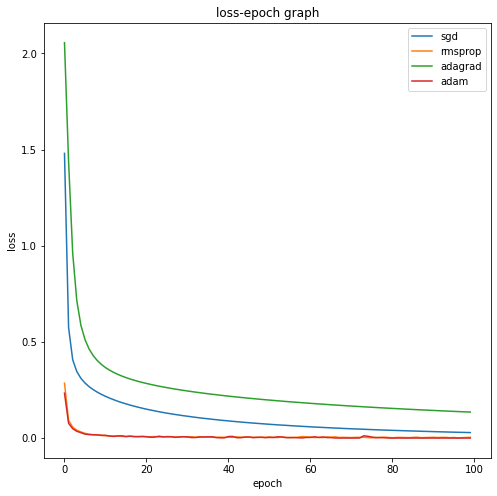

In [64]:
y_loss_sgd = history_sgd.history['loss']
y_loss_rmsprop = history_rmsprop.history['loss']
y_loss_adagrad = history_adagrad.history['loss']
y_loss_adam = history_adam.history['loss']
x_len = np.arange(len(y_loss_sgd))
plt.figure(figsize=(8, 8))
plt.plot(x_len, y_loss_sgd, label='sgd')
plt.plot(x_len, y_loss_rmsprop, label='rmsprop')
plt.plot(x_len, y_loss_adagrad, label='adagrad')
plt.plot(x_len, y_loss_adam, label='adam')
plt.legend()
plt.title('loss-epoch graph')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

<function matplotlib.pyplot.clf()>

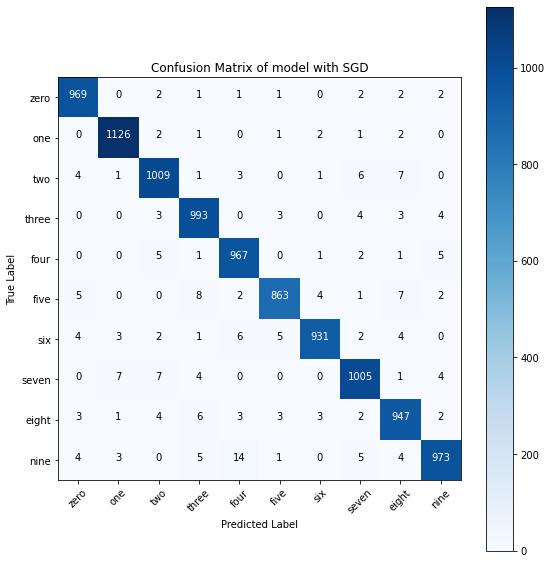

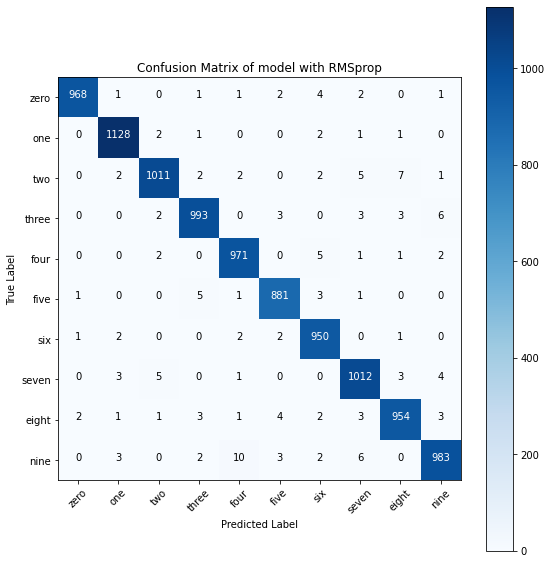

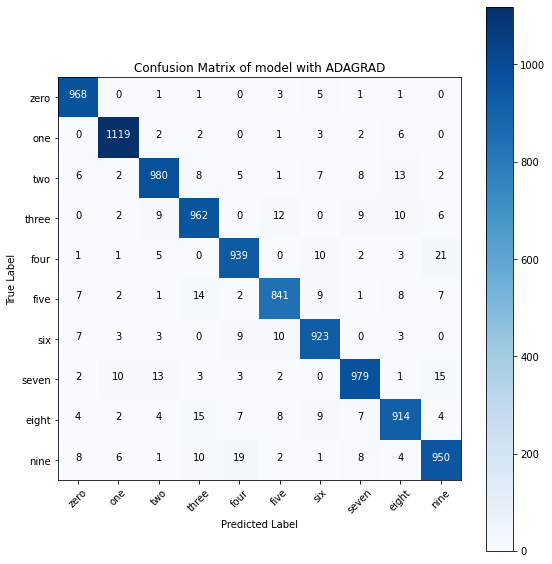

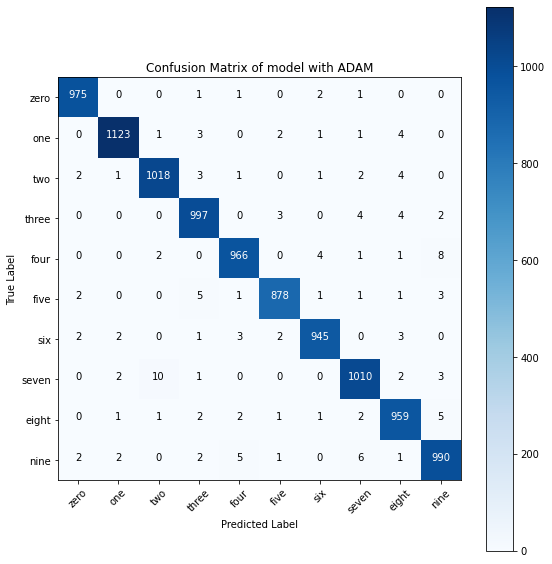

In [65]:
Y_pred_sgd = model_sgd.predict(X_test)
y_pred_sgd = np.argmax(Y_pred_sgd, axis=1)
Y_pred_rmsprop = model_rmsprop.predict(X_test)
y_pred_rmsprop = np.argmax(Y_pred_rmsprop, axis=1)
Y_pred_adagrad = model_adagrad.predict(X_test)
y_pred_adagrad = np.argmax(Y_pred_adagrad, axis=1)
Y_pred_adam = model_adam.predict(X_test)
y_pred_adam = np.argmax(Y_pred_adam, axis=1)

plt.figure(figsize=(8,8))
cm = confusion_matrix(y_gt, y_pred_sgd)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix of model with SGD")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'], rotation=45)
plt.yticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'])
thresh = cm.max()/2.
normalize = False
fmt = '.2f' if normalize else 'd'
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, format(cm[i,j], fmt), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.clf

plt.figure(figsize=(8,8))
cm = confusion_matrix(y_gt, y_pred_rmsprop)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix of model with RMSprop")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'], rotation=45)
plt.yticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'])
thresh = cm.max()/2.
normalize = False
fmt = '.2f' if normalize else 'd'
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, format(cm[i,j], fmt), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.clf

plt.figure(figsize=(8,8))
cm = confusion_matrix(y_gt, y_pred_adagrad)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix of model with ADAGRAD")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'], rotation=45)
plt.yticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'])
thresh = cm.max()/2.
normalize = False
fmt = '.2f' if normalize else 'd'
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, format(cm[i,j], fmt), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.clf

plt.figure(figsize=(8,8))
cm = confusion_matrix(y_gt, y_pred_adam)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix of model with ADAM")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'], rotation=45)
plt.yticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'])
thresh = cm.max()/2.
normalize = False
fmt = '.2f' if normalize else 'd'
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, format(cm[i,j], fmt), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.clf